In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [214]:
train = pd.read_csv('/content/drive/MyDrive/dacon/dacon2022/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/dacon/dacon2022/data/test.csv')

In [215]:
train.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0


In [216]:
train.columns

Index(['index', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'country', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation',
       'voted', 'married', 'familysize', 'ASD', 'nerdiness'],
      dtype='object')

In [217]:
train.shape

(15000, 70)

In [218]:
train = train.drop(['index'],axis = 1)
test =test.drop(['index'],axis = 1)

중복제거

In [219]:
train = train.drop_duplicates(keep='last')
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
5,5.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,...,1.0,26,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
7,4.0,5.0,4.0,4.0,4.0,4.0,2.0,5.0,3.0,4.0,...,2.0,34,1.0,2.0,5.0,1.0,1.0,2.0,2.0,1
8,4.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,...,1.0,20,1.0,7.0,1.0,1.0,1.0,3.0,2.0,0
9,3.0,3.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,4.0,...,2.0,17,1.0,10.0,1.0,2.0,1.0,5.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0


Q1 ~ Q26 : 질문의 답(1~5) (마키아벨리니즘 테스트)

conutry : 국가

introelapse : intro 부분에 걸린 시간

testelapse : test 부분에 걸린 시간

surveyelapse : survey에 걸린 시간

TIPI1 ~ TIPI10 : "나는 나 자신을 다음과 같이 생각합니다"
![](https://velog.velcdn.com/images/danbibibi/post/860d6502-7c76-4ac0-afe1-d78886ec3506/image.png)

VCL1 ~ VCL13 : 실존하는 해당 단어의 정의을 앎 (1=Yes, 0=No)

VCL14 ~ VCL16 : 허구인 단어의 정의를 앎 (1=Yes, 0=No)

education : 교육 수준 (1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답)

urban : 유년기 거주 구역 (1=시골(시골), 2=교외, 3=도시, 0=무응답)

gender : 성별

engnat : 모국어가 영어 (1=Yes, 2=No, 0=무응답)

age : 연령

hand : 필기하는 손 (1=오른쪽, 2=왼쪽, 3=둘 다, 0=무응답)

religion : 종교

orientation : 성적 취향 (1=Heterosexual, 2=Bisexual, 3=Homosexual, 4=Asexual, 5=Other)

voted : 지난 해 국가 선거 투표 여부 (1=Yes, 2=No)
 
married : 혼인 상태 (1=미혼, 2=현재 기혼, 3=이전 기혼, 0=기타)

familysize : 형제자매 수

ASD : 자폐 스펙트럼 장애

**nerdiness : 괴짜 (target)**

## Q1~Q26

negative 값: 6개뿐^^^

In [220]:
Answers = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26']

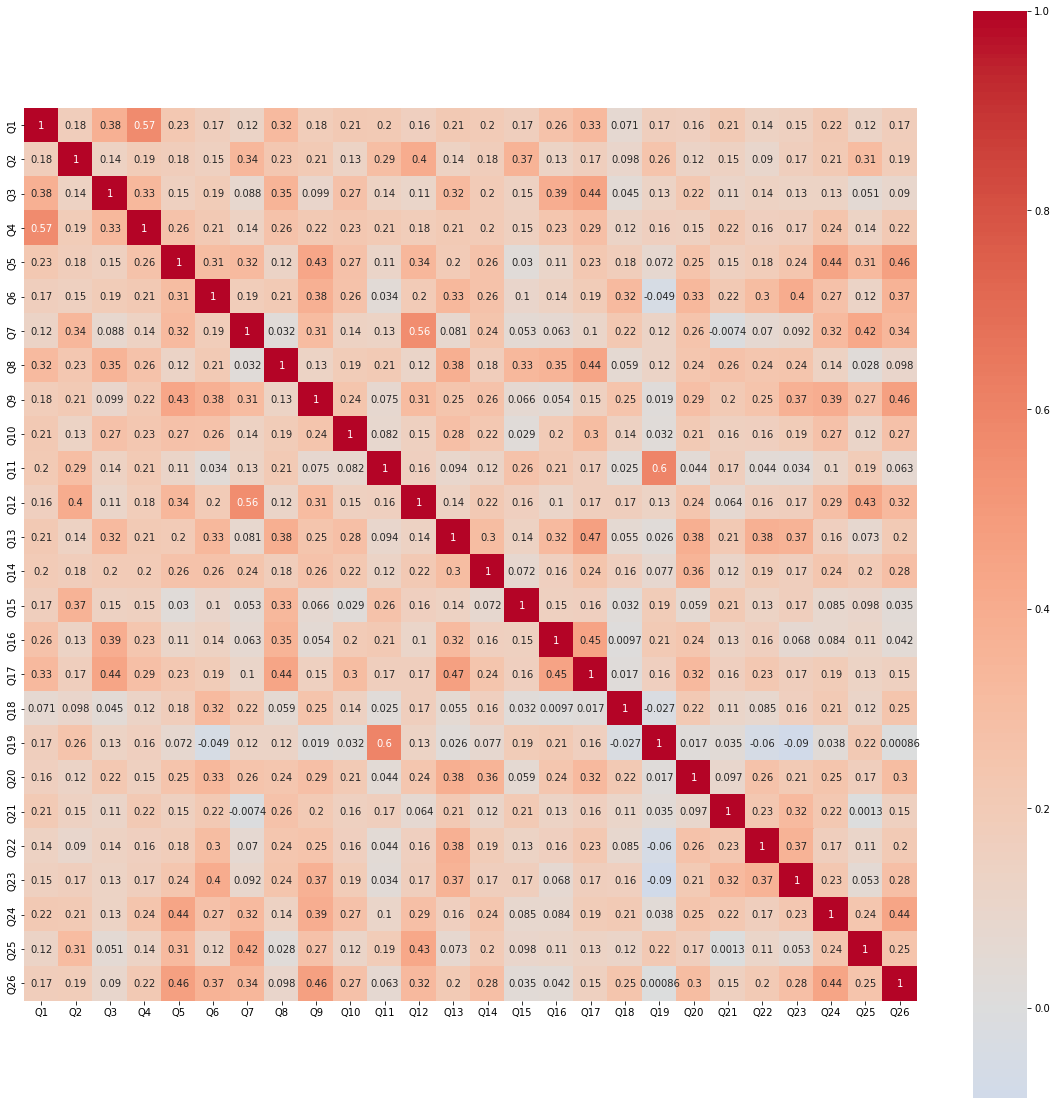

In [221]:
plt.figure(figsize=(20, 20))
correlations = train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0, annot=True)
plt.show()

## country

In [222]:
len(train.loc[train['country'] == 'USA'])

6273

In [223]:
len(train.loc[train['country'] != 'USA'])

6475

In [224]:
def change(x):
    if x=='USA':
        return 1
    else:
        return 0
train['country'] = train['country'].apply(change)
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
5,5.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,...,1.0,26,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
7,4.0,5.0,4.0,4.0,4.0,4.0,2.0,5.0,3.0,4.0,...,2.0,34,1.0,2.0,5.0,1.0,1.0,2.0,2.0,1
8,4.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,...,1.0,20,1.0,7.0,1.0,1.0,1.0,3.0,2.0,0
9,3.0,3.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,4.0,...,2.0,17,1.0,10.0,1.0,2.0,1.0,5.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0


In [225]:
test['country'] = test['country'].apply(change)
test

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD
0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,...,2.0,2.0,19,1.0,4.0,4.0,1.0,1.0,3.0,2.0
1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,...,1.0,1.0,33,1.0,1.0,5.0,2.0,1.0,5.0,2.0
2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,...,2.0,2.0,13,1.0,4.0,5.0,2.0,1.0,3.0,2.0
3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,...,1.0,1.0,28,1.0,2.0,2.0,2.0,1.0,3.0,2.0
4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,...,2.0,2.0,15,1.0,4.0,5.0,2.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,4.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,3.0,...,2.0,2.0,16,3.0,10.0,4.0,2.0,1.0,3.0,2.0
35448,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,3.0,...,3.0,1.0,16,3.0,2.0,5.0,2.0,1.0,2.0,2.0
35449,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1.0,1.0,31,1.0,1.0,5.0,1.0,1.0,2.0,2.0
35450,5.0,5.0,4.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,...,1.0,1.0,19,1.0,12.0,1.0,2.0,1.0,NaN,2.0


In [226]:
train['country'].value_counts()

0    6475
1    6273
Name: country, dtype: int64

## age

In [229]:
train[train['age']<130]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
5,5.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,...,1.0,26,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
7,4.0,5.0,4.0,4.0,4.0,4.0,2.0,5.0,3.0,4.0,...,2.0,34,1.0,2.0,5.0,1.0,1.0,2.0,2.0,1
8,4.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,...,1.0,20,1.0,7.0,1.0,1.0,1.0,3.0,2.0,0
9,3.0,3.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,4.0,...,2.0,17,1.0,10.0,1.0,2.0,1.0,5.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0


In [230]:
train = train[train['age']<130]

In [231]:
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
5,5.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,...,1.0,26,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
7,4.0,5.0,4.0,4.0,4.0,4.0,2.0,5.0,3.0,4.0,...,2.0,34,1.0,2.0,5.0,1.0,1.0,2.0,2.0,1
8,4.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,...,1.0,20,1.0,7.0,1.0,1.0,1.0,3.0,2.0,0
9,3.0,3.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,4.0,...,2.0,17,1.0,10.0,1.0,2.0,1.0,5.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0


## family size

In [233]:
train['familysize'].isnull().sum()

274

In [234]:
train['familysize'].fillna(0)

1        4.0
5        1.0
7        2.0
8        3.0
9        5.0
        ... 
14995    3.0
14996    3.0
14997    3.0
14998    2.0
14999    1.0
Name: familysize, Length: 12744, dtype: float64

In [235]:
train['familysize'] = train['familysize'].replace(np.nan, 0)

In [236]:
train = train[train['familysize']<20]
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
5,5.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,...,1.0,26,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
7,4.0,5.0,4.0,4.0,4.0,4.0,2.0,5.0,3.0,4.0,...,2.0,34,1.0,2.0,5.0,1.0,1.0,2.0,2.0,1
8,4.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,...,1.0,20,1.0,7.0,1.0,1.0,1.0,3.0,2.0,0
9,3.0,3.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,4.0,...,2.0,17,1.0,10.0,1.0,2.0,1.0,5.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0


In [237]:
# train[train['familysize']==0] = train['familysize'].mean()

In [238]:
def change(x):
    if x==0:
        return train['familysize'].mean()
    
    else:
      return x

train['familysize'] = train['familysize'].apply(change)
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
5,5.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,...,1.0,26,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
7,4.0,5.0,4.0,4.0,4.0,4.0,2.0,5.0,3.0,4.0,...,2.0,34,1.0,2.0,5.0,1.0,1.0,2.0,2.0,1
8,4.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,...,1.0,20,1.0,7.0,1.0,1.0,1.0,3.0,2.0,0
9,3.0,3.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,4.0,...,2.0,17,1.0,10.0,1.0,2.0,1.0,5.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0


In [239]:

train[train['familysize']==0]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness


## 타입 변환 -> Object

In [240]:
train['education']=train['education'].astype('str')
test['education']=test['education'].astype('str')

train['urban']=train['urban'].astype('str')
test['urban']=test['urban'].astype('str')

train['gender']=train['gender'].astype('str')
test['gender']=test['gender'].astype('str')

train['engnat']=train['engnat'].astype('str')
test['engnat']=test['engnat'].astype('str')

train['hand']=train['hand'].astype('str')
test['hand']=test['hand'].astype('str')

train['religion']=train['religion'].astype('str')
test['religion']=test['religion'].astype('str')

train['orientation'] = train['orientation'].astype('str')
test['orientation'] = test['orientation'].astype('str')

train['married']=train['married'].astype('str')
test['married']=test['married'].astype('str')

# for graph
# for i in range(1, 17):
#     train['VCL'+str(i)] = train['VCL'+str(i)].astype('object')
#     test['VCL'+str(i)] = test['VCL'+str(i)].astype('object')

## Null 값

In [241]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12741 entries, 1 to 14999
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1            12704 non-null  float64
 1   Q2            12683 non-null  float64
 2   Q3            12699 non-null  float64
 3   Q4            12684 non-null  float64
 4   Q5            12708 non-null  float64
 5   Q6            12702 non-null  float64
 6   Q7            12676 non-null  float64
 7   Q8            12699 non-null  float64
 8   Q9            12695 non-null  float64
 9   Q10           12675 non-null  float64
 10  Q11           12691 non-null  float64
 11  Q12           12685 non-null  float64
 12  Q13           12708 non-null  float64
 13  Q14           12710 non-null  float64
 14  Q15           12703 non-null  float64
 15  Q16           12713 non-null  float64
 16  Q17           12710 non-null  float64
 17  Q18           12688 non-null  float64
 18  Q19           12698 non-nu

In [242]:
train = train.dropna()
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
5,5.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,...,1.0,26,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
7,4.0,5.0,4.0,4.0,4.0,4.0,2.0,5.0,3.0,4.0,...,2.0,34,1.0,2.0,5.0,1.0,1.0,2.0,2.0,1
8,4.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,3.0,4.0,...,1.0,20,1.0,7.0,1.0,1.0,1.0,3.0,2.0,0
9,3.0,3.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,4.0,...,2.0,17,1.0,10.0,1.0,2.0,1.0,5.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0


## 원핫인코딩

In [243]:
train = pd.get_dummies(train, drop_first=True)

In [244]:
test = pd.get_dummies(test, drop_first=True)

In [245]:
train.shape

(11673, 96)

In [246]:
test.shape

(35452, 95)

# Training

In [247]:
from lightgbm import LGBMClassifier

In [248]:
#train을 target과 feature로 나눠줍니다.
train_x = train.drop(['nerdiness'], axis=1)
train_y = train['nerdiness']

In [249]:
lgbm_clf = LGBMClassifier(
            n_estimators=1000
        )
lgbm_clf.fit(train_x, train_y)

lgbm_pred = lgbm_clf.predict(test)

In [250]:
submission = pd.read_csv('/content/drive/MyDrive/dacon/dacon2022/data/sample_submission.csv')

submission

,index,nerdiness
0,0,-1
1,1,-1
2,2,-1
3,3,-1
4,4,-1
...,...,...
35447,35447,-1
35448,35448,-1
35449,35449,-1
35450,35450,-1


In [251]:
submission["nerdiness"] = lgbm_pred

In [252]:
submission

,index,nerdiness
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
35447,35447,1
35448,35448,1
35449,35449,1
35450,35450,0


In [253]:
submission.to_csv("/content/drive/MyDrive/dacon/dacon2022/submit/baseline.csv", index = False)